In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string 
import operator

In [2]:
df=pd.read_csv('legume_zero_shot_results.csv')

In [4]:
df.shape

(637, 41)

In [3]:
df.head()

,Unnamed: 0,abstract,crop yield,crop growth,breeding,pest,crop disease,resistance,stress,virus,...,chicken,fish,animal feed,meat,dairy,beef,forage,animal,biofuel,bioenergy
0,0,high fertilizer and feed costs are the main re...,0.003461,0.005265,0.004814,0.002598,0.001496,0.006668,0.006642,0.001919,...,0.001365,0.001252,0.014715,0.025267,0.001359,0.113838,0.062713,0.166039,0.001993,0.003390
1,1,this planning proposal assembles a trans-disci...,0.056302,0.138261,0.010773,0.014329,0.007546,0.046478,0.036990,0.015234,...,0.005550,0.006785,0.004460,0.005397,0.005142,0.005810,0.011579,0.011753,0.006617,0.007895
2,2,the goal of this project is to develop and imp...,0.016682,0.112610,0.002386,0.165718,0.183661,0.012300,0.010117,0.002179,...,0.000834,0.001024,0.000862,0.000940,0.000914,0.000460,0.002217,0.002146,0.001729,0.002234
3,3,we have a unique opportunity to develop protoc...,0.003094,0.004160,0.103651,0.004188,0.002089,0.320441,0.028197,0.001829,...,0.001384,0.001612,0.001273,0.001475,0.001717,0.001691,0.014178,0.003770,0.003031,0.004517
4,4,outreach and education targeted specifically a...,0.028521,0.097153,0.010250,0.087739,0.021135,0.149134,0.032219,0.010815,...,0.005155,0.004161,0.003965,0.003214,0.004431,0.004247,0.007050,0.006162,0.006165,0.010305


# Combined analysis for all the crops

In [9]:
df.columns

Index(['Unnamed: 0', 'abstract', 'crop yield', 'crop growth', 'breeding',
       'pest', 'crop disease', 'resistance', 'stress', 'virus', 'pathogen',
       'environment', 'greenhouse gas', 'climate change', 'ecosystem',
       'nitrogen', 'phosphorous', 'fertilizer', 'water', 'cover crop',
       'cropping system', 'crop rotation', 'soil', 'tillage', 'human health',
       'human diet', 'human nutrition', 'livestock', 'cattle', 'hog', 'pig',
       'chicken', 'fish', 'animal feed', 'meat', 'dairy', 'beef', 'forage',
       'animal', 'biofuel', 'bioenergy'],
      dtype='object')

In [10]:
d = df[[
    'Production: crop yield', 'Production: crop growth', 'Production: breeding', 
             'Bio_stress: pest', 'Bio_stress: crop disease', 'Bio_stress: resistance', 'Bio_stress: stress', 'Bio_stress: virus', 'Bio_stress: pathogen',
             'Environment: environment', 'Environment: greenhouse gas', 'Environment: climate change', 'Environment: ecosystem', 
             'Cultivation: nitrogen', 'Cultivation: phosphorous', 'Cultivation: fertilizer', 'Cultivation: water', 'Cultivation: cover crop', 
             'Cultivation: cropping system', 'Cultivation: crop rotation', 'Cultivation: soil', 'Cultivation: tillage', 
             'Human_health: human health', 'Human_health: human diet', 'Human_health: human nutrition', 
             'Animal: livestock', 'Animal: cattle', 'Animal: hog', 'Animal: pig', 'Animal: chicken', 'Animal: fish', 'Animal: animal feed', 
             'Animal: meat', 'Animal: dairy', 'Animal: beef', 'Animal: forage', 'Animal: animal', 
             'Bioenegry: biofuel', 'Bioenegry: bioenergy'
]]

In [13]:
production = ['Production: crop yield', 'Production: crop growth', 'Production: breeding']
bio_stress = [
    'Bio_stress: pest', 'Bio_stress: crop disease', 'Bio_stress: resistance',
    'Bio_stress: stress', 'Bio_stress: virus', 'Bio_stress: pathogen'
]
environment = [
    'Environment: environment', 'Environment: greenhouse gas',
    'Environment: climate change', 'Environment: ecosystem'
]
cultivation = [
    'Cultivation: nitrogen', 'Cultivation: phosphorous',
    'Cultivation: fertilizer', 'Cultivation: water', 'Cultivation: cover crop',
    'Cultivation: cropping system', 'Cultivation: crop rotation',
    'Cultivation: soil', 'Cultivation: tillage'
]
human_health = [
    'Human_health: human health', 'Human_health: human diet',
    'Human_health: human nutrition'
]
animal = [
    'Animal: livestock', 'Animal: cattle', 'Animal: hog', 'Animal: pig',
    'Animal: chicken', 'Animal: fish', 'Animal: animal feed', 'Animal: meat',
    'Animal: dairy', 'Animal: beef', 'Animal: forage', 'Animal: animal'
]
bioenegry = ['Bioenegry: biofuel', 'Bioenegry: bioenergy']

In [16]:
df['Max_sub_category']=d.idxmax(axis=1)
df['Max_Category']=df['Max_sub_category']

In [18]:
df.loc[df.Max_sub_category.isin(production),'Max_Category']='Production'
df.loc[df.Max_sub_category.isin(bio_stress),'Max_Category']='Biological Stress'
df.loc[df.Max_sub_category.isin(environment),'Max_Category']='Environment'
df.loc[df.Max_sub_category.isin(cultivation),'Max_Category']='Cultivation'
df.loc[df.Max_sub_category.isin(human_health),'Max_Category']='Human Health'
df.loc[df.Max_sub_category.isin(animal),'Max_Category']='Animal'
df.loc[df.Max_sub_category.isin(bioenegry),'Max_Category']='Bioenegry'

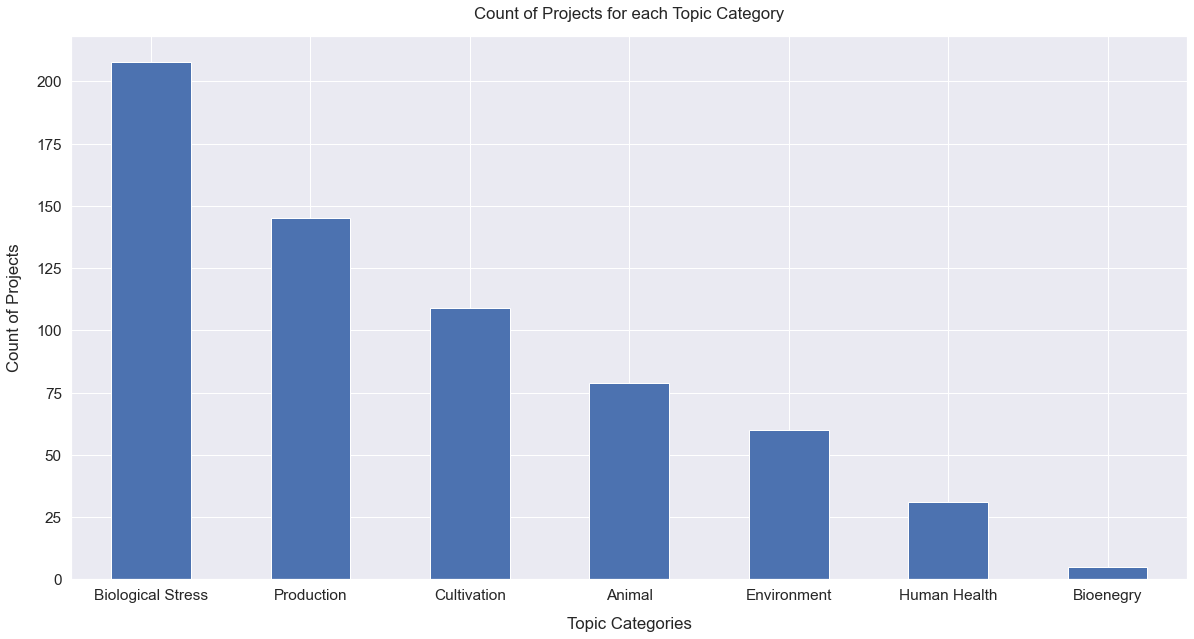

In [39]:
df.Max_Category.value_counts()
sns.set(font_scale=1.4)
fig = plt.figure(figsize=(20, 10))
df.Max_Category.value_counts().plot(kind='bar', rot=0)
plt.xlabel("Topic Categories", labelpad=14)
plt.ylabel("Count of Projects", labelpad=14)
plt.title("Count of Projects for each Topic Category", y=1.02)
plt.savefig('legume_topic_distribution.png')

In [27]:
temp=pd.read_csv('legume_no_zero_duplicates.csv')
temp['Cat']='N/A'
temp.head()

,Unnamed: 0,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ABSTRACT,Cat
0,242,582571,Animals; Area; beef; Cattle; Complement; cost...,''BEEF CATTLE PRODUCTION ON GRASS-LEGUME MIXES...,USDA,NIFA,NaN,2009-55618-05082,9/1/2009,8/31/2013,...,72701-0000,UNITED STATES,NaN,NaN,10.212,2008,450000.0,NaN,High fertilizer and feed costs are the main re...,N/A
1,243,582620,agricultural center; Almond Nut; Apple; Arizo...,A MULTITASKING SENSOR PLATFORM FOR PRECISION M...,USDA,NIFA,NaN,2008-51180-04884,5/1/2008,12/31/2009,...,95618-6134,UNITED STATES,NaN,NaN,10.212,2008,99994.0,NaN,This planning proposal assembles a trans-disci...,N/A
2,244,582632,Address; Adopted; Aubergine; base; bean; Cali...,MULTI-FACETED APPROACH FOR SOIL DETECTION AND ...,USDA,NIFA,NaN,2008-51180-04881,6/1/2008,1/31/2010,...,48824-1046,UNITED STATES,NaN,NaN,10.212,2008,555185.0,NaN,The goal of this project is to develop and imp...,N/A
3,245,582731,Address; Adolescent; American; Breeding; Chin...,EVALUATING ENVIRONMENTAL IMPACTS OF TRANSGENIC...,USDA,NIFA,NaN,2008-39211-19564,10/1/2013,9/30/2015,...,13210-2712,UNITED STATES,NaN,NaN,10.203,2008,379980.0,NaN,We have a unique opportunity to develop protoc...,N/A
4,246,582780,Adoption; Agriculture; Agrochemicals; Apple; ...,"POTATO PEST MANAGEMENT, WI",USDA,NIFA,NaN,2008-45053-04754,10/1/2013,9/30/2015,...,53706-1415,UNITED STATES,NaN,NaN,10.202,2008,282903.0,NaN,Outreach and education targeted specifically a...,N/A


In [29]:
temp.loc[((temp['ABSTRACT'].str.contains(r'\bnuts') | temp['PROJECT_TERMS'].str.contains(r'\bnuts')| 
           temp['PROJECT_TITLE'].str.contains(r'\bnuts') |temp['ABSTRACT'].str.contains(r'\bNuts') | 
           temp['PROJECT_TERMS'].str.contains(r'\bNuts')| temp['PROJECT_TITLE'].str.contains(r'\bNuts'))&
           ((temp['ABSTRACT'].str.contains(r'\bpeanuts')==False) | (temp['PROJECT_TERMS'].str.contains(r'\bpeanuts')==False)| 
           (temp['PROJECT_TITLE'].str.contains(r'\bpeanuts')==False) |(temp['ABSTRACT'].str.contains(r'\bPeanuts')==False) | 
           (temp['PROJECT_TERMS'].str.contains(r'\bPeanuts')==False)| (temp['PROJECT_TITLE'].str.contains(r'\bPeanuts')==False))),'Cat']='Nuts but No Peanuts'
temp.loc[((temp['ABSTRACT'].str.contains(r'\bpeanuts') | temp['PROJECT_TERMS'].str.contains(r'\bpeanuts')| 
           temp['PROJECT_TITLE'].str.contains(r'\bpeanuts') |temp['ABSTRACT'].str.contains(r'\bPeanuts') | 
           temp['PROJECT_TERMS'].str.contains(r'\bPeanuts')| temp['PROJECT_TITLE'].str.contains(r'\bPeanuts'))),'Cat']='Peanuts'
           

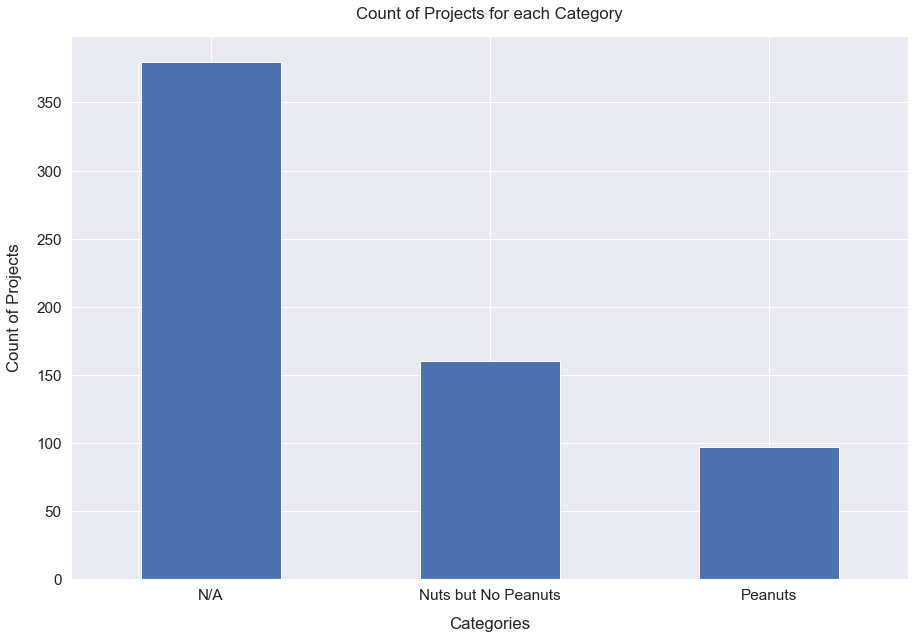

In [37]:
df.Max_Category.value_counts()
sns.set(font_scale=1.4)
fig = plt.figure(figsize=(15, 10))
temp.Cat.value_counts().plot(kind='bar', rot=0)
plt.xlabel("Categories", labelpad=14)
plt.ylabel("Count of Projects", labelpad=14)
plt.title("Count of Projects for each Category", y=1.02)
plt.savefig('legume_distribution.png')